# Task 4: Insights & Recommendations for Fintech App Customer Experience

This notebook derives actionable insights, visualizes key trends, and provides recommendations based on customer review data.

In [15]:
# 1. Imports and Setup

import pandas as pd
import ast
import sys
import re
import os
sys.path.append(os.path.abspath("../src"))
from collections import Counter
project_root = os.path.abspath("..")
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
data_path = os.path.join(project_root, "data", "reviews_with_sentiment.csv")
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from analysis.visualization import plot_sentiment_trends, plot_rating_distribution, plot_keyword_cloud
df = pd.read_csv(data_path)

from analysis.insights import extract_drivers_painpoints, compare_banks
from analysis.recommendations import generate_recommendations
from analysis.visualization import plot_sentiment_trends, plot_rating_distribution, plot_keyword_cloud
from analysis.ethics import note_biases

print(df.columns)
print(df.head())

Index(['review', 'rating', 'date', 'bank', 'source', 'sentiment_label',
       'sentiment_score'],
      dtype='object')
                                              review  rating        date  \
0  The previous version is much better than this ...       2  2021-01-01   
1  The good thing is its simplicity to undertake ...       3  2023-03-15   
2  The updated app is attractive and is working v...       4  2020-07-25   
3  I love this app. It's simple to use and syncs ...       5  2021-09-25   
4  It is a service that is not expected from such...       1  2024-10-16   

                          bank       source sentiment_label  sentiment_score  
0  Commercial Bank of Ethiopia  Google Play        negative         0.999113  
1  Commercial Bank of Ethiopia  Google Play        negative         0.992057  
2  Commercial Bank of Ethiopia  Google Play        positive         0.999179  
3  Commercial Bank of Ethiopia  Google Play        positive         0.996824  
4  Commercial Bank of Ethio

In [ ]:
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df['derived_sentiment'] = df['rating'].apply(map_rating_to_sentiment)
print(df['derived_sentiment'].value_counts()) 

def get_top_words(texts, n=5):
    words = []
    for text in texts:
        tokens = re.findall(r'\b[a-z]{3,}\b', str(text).lower())
        words.extend([w for w in tokens if w not in ENGLISH_STOP_WORDS])
    return [w for w, _ in Counter(words).most_common(n)]

def extract_drivers_painpoints(
    df,
    sentiment_col='derived_sentiment',  
    text_col='review',
    bank_col='bank'
):
    insights = {}
    for bank in df[bank_col].unique():
        bank_df = df[df[bank_col] == bank]
        pos_texts = bank_df[bank_df[sentiment_col] == 'positive'][text_col]
        neg_texts = bank_df[bank_df[sentiment_col] == 'negative'][text_col]
        insights[bank] = {
            'drivers': get_top_words(pos_texts),
            'painpoints': get_top_words(neg_texts)
        }
    return insights

insights = extract_drivers_painpoints(df)
print(insights)

derived_sentiment
positive    571
negative    499
neutral     110
Name: count, dtype: int64
{'Commercial Bank of Ethiopia': {'drivers': ['app', 'good', 'transaction', 'use', 'bank'], 'painpoints': ['app', 'money', 'update', 'account', 'doesn']}, 'Bank of Abyssinia': {'drivers': ['app', 'good', 'use', 'easy', 'boa'], 'painpoints': ['app', 'bank', 'work', 'mobile', 'banking']}, 'Dashen Bank': {'drivers': ['app', 'dashen', 'super', 'banking', 'bank'], 'painpoints': ['app', 'bank', 'slow', 'working', 'good']}}


In [17]:
sentiment_comparison = compare_banks(df, bank_col='bank', sentiment_col='sentiment_label')
display(sentiment_comparison)

sentiment_label,negative,positive
bank,,
Bank of Abyssinia,341,59
Commercial Bank of Ethiopia,298,102
Dashen Bank,99,281


In [18]:
## Recommendations
recommendations = generate_recommendations(insights)
for bank, recs in recommendations.items():
    print(f"Recommendations for {bank}:")
    for rec in recs[:2]:  # At least 2 improvements
        print(" -", rec)
    print()

Recommendations for Commercial Bank of Ethiopia:
 - Address customer concern: 'app' (e.g., improve this area)
 - Address customer concern: 'money' (e.g., improve this area)

Recommendations for Bank of Abyssinia:
 - Address customer concern: 'app' (e.g., improve this area)
 - Address customer concern: 'bank' (e.g., improve this area)

Recommendations for Dashen Bank:
 - Address customer concern: 'app' (e.g., improve this area)
 - Address customer concern: 'bank' (e.g., improve this area)



d:\OLD file\dektop\10Acd\Customer-Experience-Analytics-for-Fintech-Apps\src\analysis\visualization.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend = df.groupby([bank_col, pd.Grouper(key=date_col, freq='M')])[sentiment_col].value_counts().unstack().fillna(0)


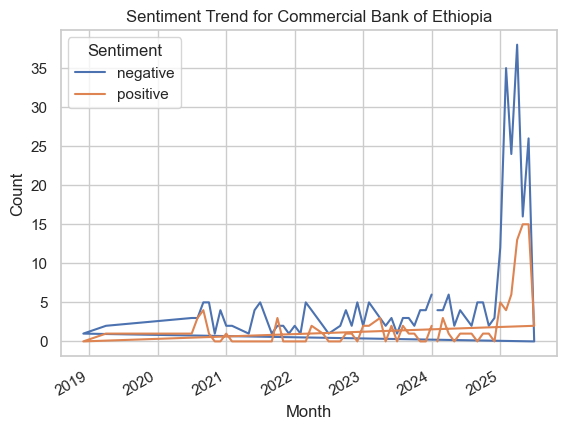

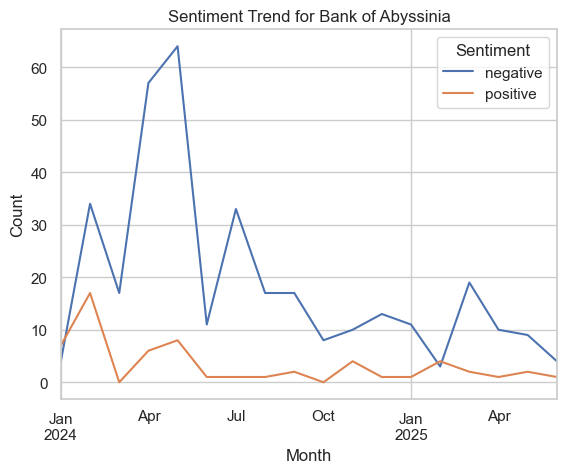

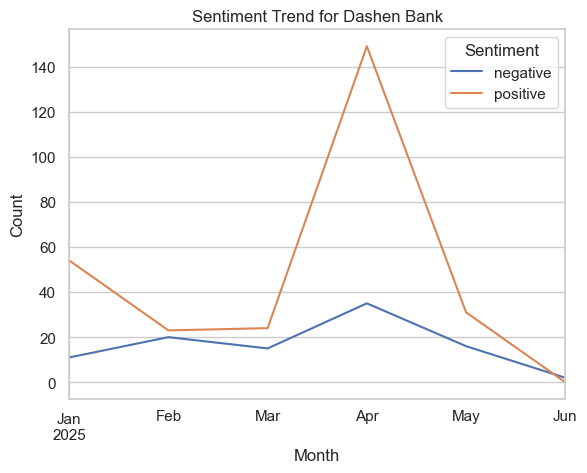

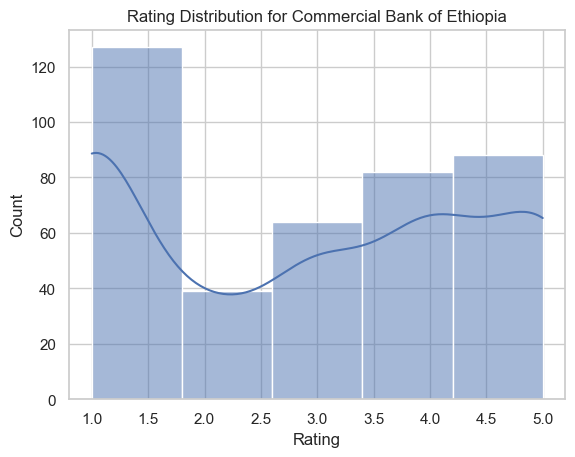

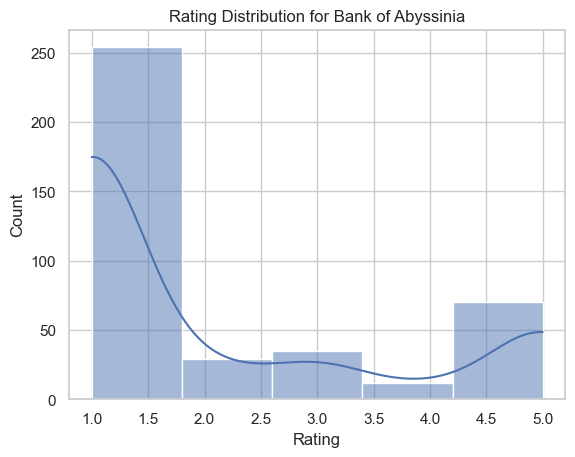

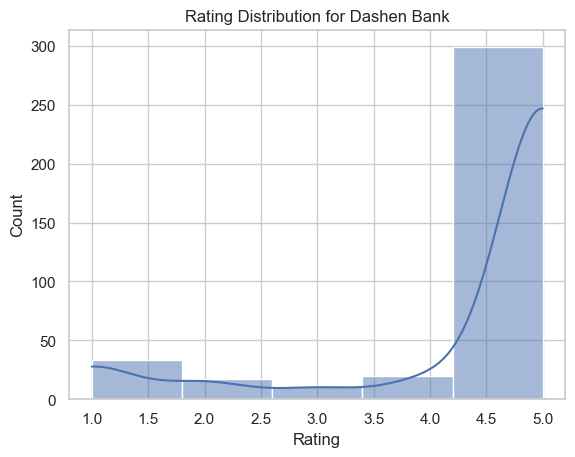

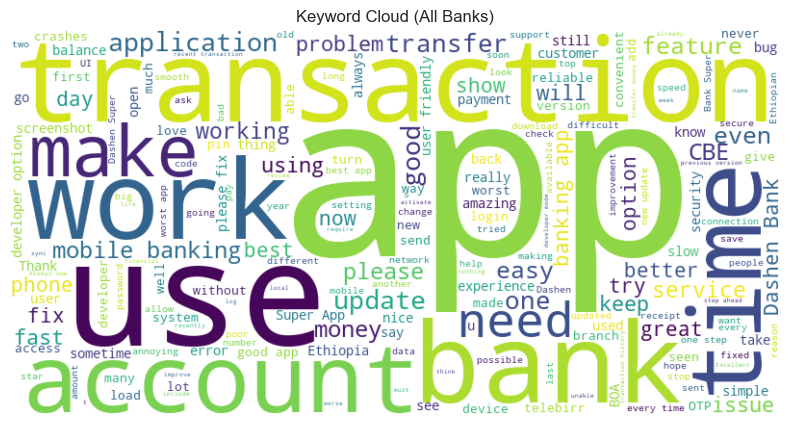

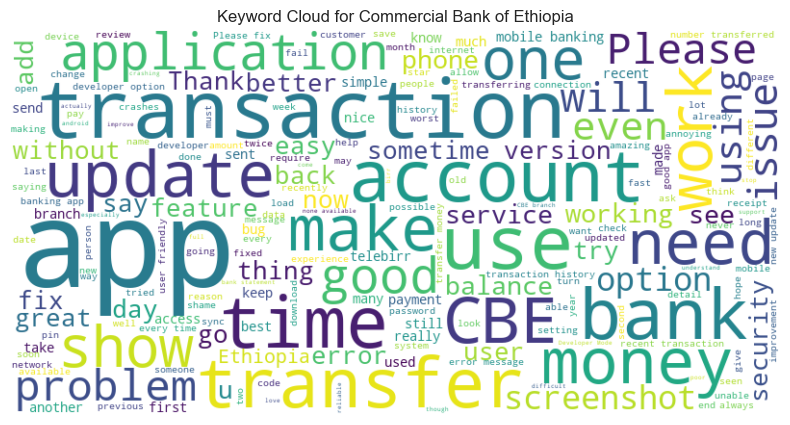

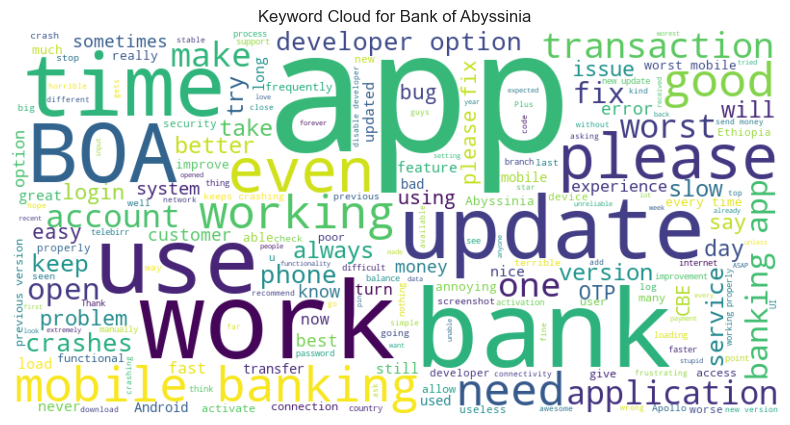

In [19]:

## Visualizations

# 1. Sentiment trends over time
plot_sentiment_trends(df, date_col='date', sentiment_col='sentiment_label', bank_col='bank')

# 2. Rating distribution for each bank
plot_rating_distribution(df, rating_col='rating', bank_col='bank')

# 3. Keyword cloud for all banks
plot_keyword_cloud(df, text_col='review')

# 4. Keyword cloud for CBE
plot_keyword_cloud(df, text_col='review', bank='Commercial Bank of Ethiopia', bank_col='bank')

# 5. Keyword cloud for BOA
plot_keyword_cloud(df, text_col='review', bank='Bank of Abyssinia', bank_col='bank')

In [20]:
## Ethics: Review Biases

bias_note = note_biases(df, sentiment_col='sentiment_label')
print(bias_note)

Out of 1180 reviews, 738 are negative (62.5%), 442 are positive (37.5%). There is a notable negative skew, which may indicate review bias (e.g., dissatisfied customers more likely to leave feedback).
Consider these biases when interpreting insights and recommendations.
